<a href="https://colab.research.google.com/github/Dunckleosteus/Peroskite/blob/domnul/Daria_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scope> Predict crystal structure for a given set of perovskite crystal with specified properties


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Crystal_structure.csv to Crystal_structure.csv


In [8]:
raw_data = pd.read_csv('Crystal_structure.csv')

raw_data.head(5)

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic


In [9]:
raw_data.columns = raw_data.columns.str.replace(' ', '_')
raw_data.head(5)

,Compound,A,B,In_literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest_distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic


In [10]:
raw_data.describe()

,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ
count,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000
mean,0.974656,0.825617,0.817845,1.572466,1.572466,2.289800,2.012587,-2.199993,0.766090,0.584176
std,0.337139,0.245000,0.247480,0.449248,0.449248,0.664239,0.598509,0.668465,0.136280,0.176770
min,0.270000,0.270000,0.270000,0.790000,0.790000,0.000000,0.000000,-5.411536,0.384648,0.192857
25%,0.690000,0.630000,0.630000,1.200000,1.200000,2.290644,1.956808,-2.604821,0.668537,0.450000
50%,0.930000,0.800000,0.770000,1.550000,1.550000,2.393444,2.096141,-2.101179,0.756440,0.550000
75%,1.180000,0.950000,0.950000,1.930000,1.930000,2.571812,2.286435,-1.711500,0.850628,0.678571
max,1.880000,1.670000,1.670000,2.540000,2.540000,3.300176,3.009747,-0.601714,1.388809,1.192857


In [11]:
import pandas as pd

# Reload the data if raw_data is not a DataFrame
raw_data = pd.read_csv('/content/drive/MyDrive/ML_Perovskite/Crystal_structure.csv')
raw_data.columns = raw_data.columns.str.replace(' ', '_')

# Now create the copy
data_copy = raw_data.copy()

# Print the first 5 rows
data_copy.head(5)

,Compound,A,B,In_literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest_distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic


In [12]:
data_copy.dtypes
value_counts_per_column = data_copy.count()
print(value_counts_per_column)

Compound             5329
A                    5329
B                    5329
In_literature        5329
v(A)                 5329
v(B)                 5329
r(AXII)(Å)           5329
r(AVI)(Å)            5329
r(BVI)(Å)            5329
EN(A)                5329
EN(B)                5329
l(A-O)(Å)            5329
l(B-O)(Å)            5329
ΔENR                 5329
tG                   5329
τ                    5329
μ                    5329
Lowest_distortion    5329
dtype: int64


In [13]:
data_copy.shape

(5329, 18)

Removed A,B, In literature columns because they did not bring any significant information and the τ column because it had numeorous missing values


In [14]:
remove_columns = ['A', 'B', 'In_literature', 'τ']
new_data = data_copy.copy()
new_data.drop(columns=remove_columns, inplace=True)
new_data.head(5)
new_data.shape

(5329, 14)

In [15]:
print(new_data[['v(A)', 'v(B)']].dtypes)

v(A)    object
v(B)    object
dtype: object


In [16]:
# Convert 'v(A)' and 'v(B)' to a suitable numeric type
new_data['v(A)'] = pd.to_numeric(new_data['v(A)'], errors='coerce')
new_data['v(B)'] = pd.to_numeric(new_data['v(B)'], errors='coerce')

# Now replace 0 with NaN and drop rows with NaN
new_data['v(A)'] = new_data['v(A)'].replace(0, np.nan)
new_data['v(B)'] = new_data['v(B)'].replace(0, np.nan)
new_data.dropna(inplace=True)
new_data.head(10)


,Compound,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ,Lowest_distortion
76,AgAsO3,1.0,5.0,1.28,0.95,0.46,1.93,2.18,2.761453,1.932227,-1.389214,1.018842,0.328571,tetragonal
78,AgBO3,3.0,3.0,0.75,0.95,0.27,1.93,2.04,2.761453,1.624662,-0.852321,0.910347,0.192857,cubic
81,AgBiO3,1.0,5.0,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,0.542857,rhombohedral
86,AgCrO3,1.0,5.0,1.28,0.95,0.49,1.93,1.66,2.761453,1.960053,-1.679964,1.002670,0.350000,orthorhombic
100,AgIrO3,1.0,5.0,1.28,0.95,0.57,1.93,2.20,2.761453,2.009083,-1.574536,0.961952,0.407143,rhombohedral
107,AgMoO3,1.0,5.0,1.28,0.95,0.61,1.93,2.16,2.761453,1.789300,-1.663536,0.942809,0.435714,cubic
109,AgNbO3,1.0,5.0,1.28,0.95,0.64,1.93,1.60,2.761453,1.955055,-1.972571,0.928944,0.457143,rhombohedral
122,AgReO3,1.0,5.0,1.28,0.95,0.58,1.93,1.90,2.761453,1.987971,-1.729357,0.957094,0.414286,cubic
124,AgRuO3,1.0,5.0,1.28,0.95,0.57,1.93,2.20,2.761453,2.018753,-1.574536,0.961952,0.407143,rhombohedral
125,AgSbO3,1.0,5.0,1.28,0.95,0.60,1.93,2.05,2.761453,2.075849,-1.696143,0.947523,0.428571,orthorhombic


In [17]:

# Convert 'v(A)' and 'v(B)' to category
new_data['v(A)'] = new_data['v(A)'].astype('category')
new_data['v(B)'] = new_data['v(B)'].astype('category')
new_data['Lowest_distortion']=new_data['Lowest_distortion'].str.replace('-','')

new_data.info()
new_data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 76 to 5324
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Compound           2215 non-null   object  
 1   v(A)               2215 non-null   category
 2   v(B)               2215 non-null   category
 3   r(AXII)(Å)         2215 non-null   float64 
 4   r(AVI)(Å)          2215 non-null   float64 
 5   r(BVI)(Å)          2215 non-null   float64 
 6   EN(A)              2215 non-null   float64 
 7   EN(B)              2215 non-null   float64 
 8   l(A-O)(Å)          2215 non-null   float64 
 9   l(B-O)(Å)          2215 non-null   float64 
 10  ΔENR               2215 non-null   float64 
 11  tG                 2215 non-null   float64 
 12  μ                  2215 non-null   float64 
 13  Lowest_distortion  2215 non-null   object  
dtypes: category(2), float64(10), object(2)
memory usage: 229.7+ KB


(2215, 14)

In [18]:
# Create a copy of filtered_data
filtered_data_encoded = new_data.copy()
# Perform one-hot encoding on the copy
filtered_data_encoded = pd.get_dummies(filtered_data_encoded, columns=['v(A)', 'v(B)'], prefix=['v(A)', 'v(B)'])
filtered_data_encoded.head(10)

,Compound,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,...,v(A)_1.0,v(A)_2.0,v(A)_3.0,v(A)_4.0,v(A)_5.0,v(B)_1.0,v(B)_2.0,v(B)_3.0,v(B)_4.0,v(B)_5.0
76,AgAsO3,1.28,0.95,0.46,1.93,2.18,2.761453,1.932227,-1.389214,1.018842,...,True,False,False,False,False,False,False,False,False,True
78,AgBO3,0.75,0.95,0.27,1.93,2.04,2.761453,1.624662,-0.852321,0.910347,...,False,False,True,False,False,False,False,True,False,False
81,AgBiO3,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,...,True,False,False,False,False,False,False,False,False,True
86,AgCrO3,1.28,0.95,0.49,1.93,1.66,2.761453,1.960053,-1.679964,1.002670,...,True,False,False,False,False,False,False,False,False,True
100,AgIrO3,1.28,0.95,0.57,1.93,2.20,2.761453,2.009083,-1.574536,0.961952,...,True,False,False,False,False,False,False,False,False,True
107,AgMoO3,1.28,0.95,0.61,1.93,2.16,2.761453,1.789300,-1.663536,0.942809,...,True,False,False,False,False,False,False,False,False,True
109,AgNbO3,1.28,0.95,0.64,1.93,1.60,2.761453,1.955055,-1.972571,0.928944,...,True,False,False,False,False,False,False,False,False,True
122,AgReO3,1.28,0.95,0.58,1.93,1.90,2.761453,1.987971,-1.729357,0.957094,...,True,False,False,False,False,False,False,False,False,True
124,AgRuO3,1.28,0.95,0.57,1.93,2.20,2.761453,2.018753,-1.574536,0.961952,...,True,False,False,False,False,False,False,False,False,True
125,AgSbO3,1.28,0.95,0.60,1.93,2.05,2.761453,2.075849,-1.696143,0.947523,...,True,False,False,False,False,False,False,False,False,True


In [19]:
# Assuming 'filtered_data_encoded' is your DataFrame with one-hot encoded columns

# List of one-hot encoded columns
one_hot_columns = ['v(A)_1.0', 'v(A)_2.0', 'v(A)_3.0', 'v(A)_4.0', 'v(A)_5.0', 'v(B)_1.0', 'v(B)_2.0', 'v(B)_3.0', 'v(B)_4.0', 'v(B)_5.0'] # Replace with your actual column names if different


# Convert True/False to 1/0 and change data type to float64
for column in one_hot_columns:
    filtered_data_encoded[column] = filtered_data_encoded[column].astype(int).astype('float64')

filtered_data_encoded.head(5)

,Compound,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,...,v(A)_1.0,v(A)_2.0,v(A)_3.0,v(A)_4.0,v(A)_5.0,v(B)_1.0,v(B)_2.0,v(B)_3.0,v(B)_4.0,v(B)_5.0
76,AgAsO3,1.28,0.95,0.46,1.93,2.18,2.761453,1.932227,-1.389214,1.018842,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
78,AgBO3,0.75,0.95,0.27,1.93,2.04,2.761453,1.624662,-0.852321,0.910347,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
81,AgBiO3,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
86,AgCrO3,1.28,0.95,0.49,1.93,1.66,2.761453,1.960053,-1.679964,1.002670,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100,AgIrO3,1.28,0.95,0.57,1.93,2.20,2.761453,2.009083,-1.574536,0.961952,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
filtered_data_encoded['Lowest_distortion'] = filtered_data_encoded['Lowest_distortion'].astype('category')
filtered_data_encoded.dtypes

,0
Compound,object
r(AXII)(Å),float64
r(AVI)(Å),float64
r(BVI)(Å),float64
EN(A),float64
EN(B),float64
l(A-O)(Å),float64
l(B-O)(Å),float64
ΔENR,float64
tG,float64


In [21]:
# Convert 'l(A-O)(Å)' and 'l(B-O)(Å)' to numeric type
filtered_data_encoded['l(A-O)(Å)'] = pd.to_numeric(filtered_data_encoded['l(A-O)(Å)'], errors='coerce')
filtered_data_encoded['l(B-O)(Å)'] = pd.to_numeric(filtered_data_encoded['l(B-O)(Å)'], errors='coerce')


In [25]:
#Remove the '-' category
# Replace empty strings with NaN and drop NaN values
filtered_data_encoded['Lowest_distortion'] = filtered_data_encoded['Lowest_distortion'].replace('', np.nan)
filtered_data_encoded.dropna(subset=['Lowest_distortion'], inplace=True)


# Verify removal of '' category
unique_distortions = filtered_data_encoded['Lowest_distortion'].unique()
print("Unique values after removal of '' category:", unique_distortions)

Unique values after removal of '' category: ['tetragonal', 'cubic', 'rhombohedral', 'orthorhombic']
Categories (4, object): ['cubic', 'orthorhombic', 'rhombohedral', 'tetragonal']


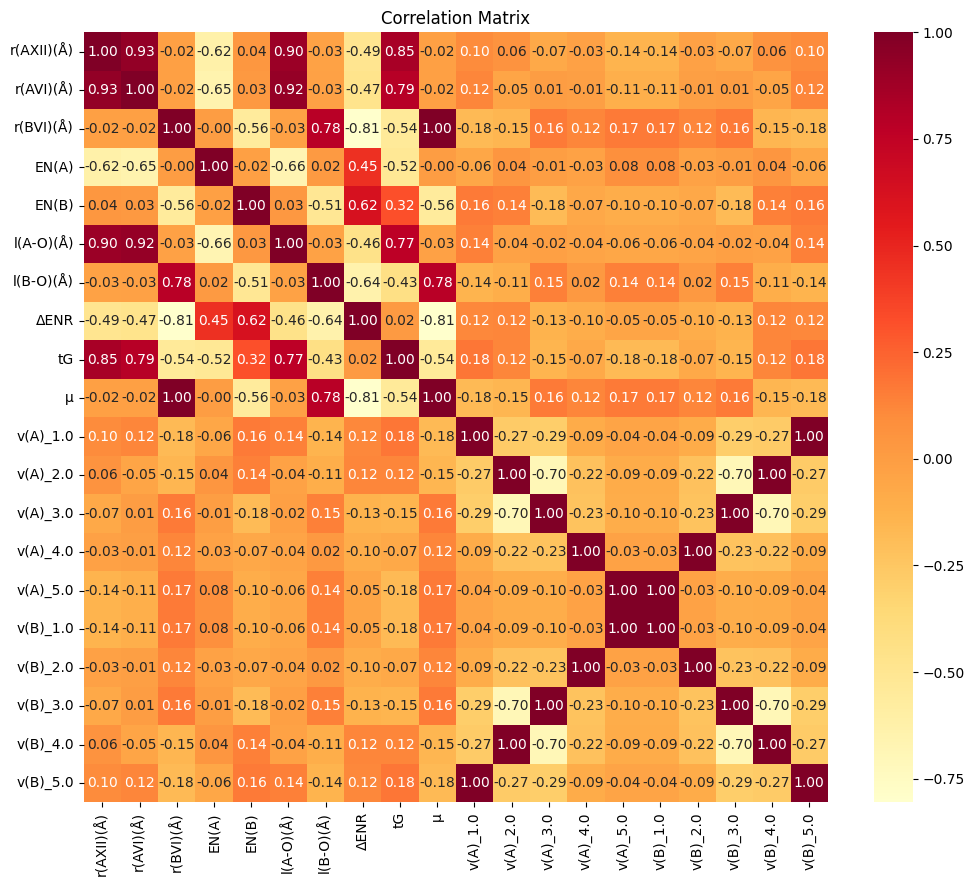

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select all numerical columns, including one-hot encoded ones
numerical_data = filtered_data_encoded.select_dtypes(include=['number', 'uint8']) # Include 'uint8' to capture one-hot encoded columns

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# KNN


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Separate features (X) and target (y)
X = filtered_data_encoded.drop(columns=['Compound', 'Lowest_distortion'])
y = filtered_data_encoded['Lowest_distortion']

# 2. Perform one-hot encoding on the target variable 'Lowest_distortion'
y_encoded = pd.get_dummies(y, prefix=['Lowest_distortion'])

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y_encoded, random_state=42)

# 4. Define hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Try different values for k
    'metric': ['euclidean', 'manhattan']  # Try different distance metrics
}

# 5. Create and train the KNN model with GridSearchCV
knn_model = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# 6. Get the best KNN model and its hyperparameters
best_knn_model = grid_search_knn.best_estimator_
best_knn_params = grid_search_knn.best_params_

# 7. Make predictions on the test set
y_pred_knn = best_knn_model.predict(X_test)

# 8. Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Best Hyperparameters for KNN: {best_knn_params}")
print(f"Accuracy with Best KNN Model: {accuracy_knn}")

Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5}
Accuracy with Best KNN Model: 0.781038374717833


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# 9. Calculate and print classification report
report = classification_report(y_test, y_pred_knn, target_names=y_encoded.columns)  # Use target_names for category labels
print(report)


                                    precision    recall  f1-score   support

       ['Lowest_distortion']_cubic       0.81      0.91      0.86       275
['Lowest_distortion']_orthorhombic       0.70      0.67      0.69       129
['Lowest_distortion']_rhombohedral       0.78      0.27      0.40        26
  ['Lowest_distortion']_tetragonal       0.67      0.15      0.25        13

                          accuracy                           0.78       443
                         macro avg       0.74      0.50      0.55       443
                      weighted avg       0.77      0.78      0.76       443



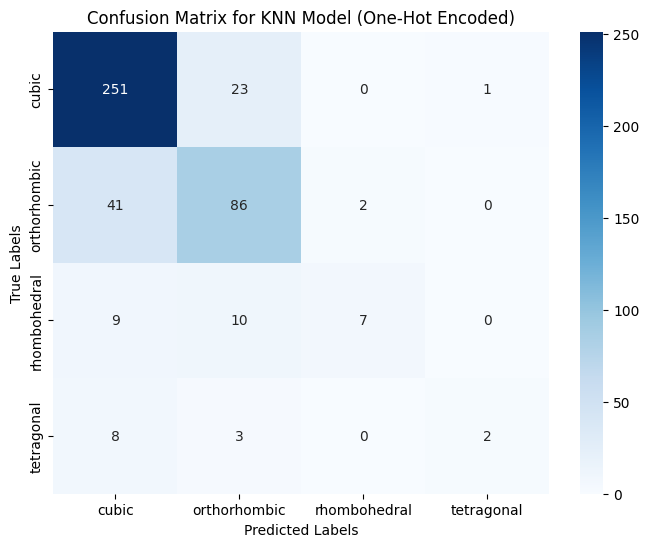

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_knn are from your KNN model training
# and y_encoded contains the one-hot encoded target labels

# 1. No need to convert y_pred_knn as it's already in class labels
#y_pred_knn_labels = np.argmax(y_pred_knn, axis=1)  # This line is causing the error
#target_names = sorted(filtered_data_encoded['Lowest_distortion'].unique())
#y_pred_knn_labels = [target_names[i] for i in y_pred_knn_labels]

# Get unique class labels directly from y_test
target_names = sorted(y_test.unique())

# 2. Create confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=target_names)

# 3. Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for KNN Model (One-Hot Encoded)")
plt.show()

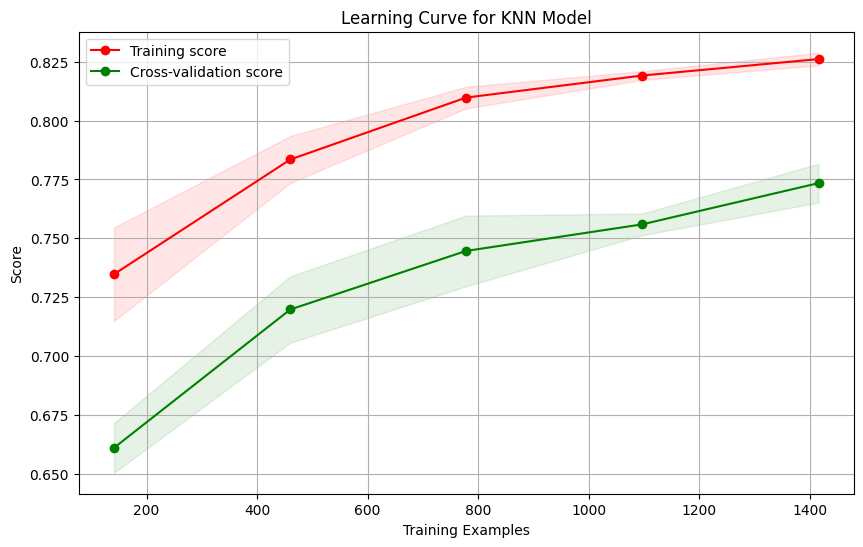

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming you have X_train, y_train, and best_knn_model from your previous code

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    best_knn_model, X_train, y_train, cv=5, scoring='accuracy',
    n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5) # Adjust train_sizes as needed
)

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for KNN Model")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

#Decision Tree

In [31]:

import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report



In [32]:
# 1. Separate features (X) and target (y)
X = filtered_data_encoded.drop(columns=['Compound', 'Lowest_distortion'])  #dropped columns that are not useful or are highly correlated
y = filtered_data_encoded['Lowest_distortion']



In [33]:
# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)  # Adjust test_size and random_state as needed can modify random state to 123

In [34]:
# 3. Define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [35]:
# 4. Create and train the Decision Tree model with GridSearchCV
tree_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree_model, param_grid, cv=3, scoring='accuracy')  # cv=3/5/10
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [36]:
# 5. Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [37]:
# 6. Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary functions

# Assuming y_pred is already calculated
accuracy = accuracy_score(y_test, y_pred)  # Compare y_test (true values) with y_pred (predicted values)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 3. Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7607
Precision: 0.7430
Recall: 0.7607
F1-score: 0.7342


In [39]:
# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy with Best Model: {accuracy}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy with Best Model: 0.7607223476297968


In [40]:
# Get the unique class labels from the original 'Lowest_distortion' column in filtered_data_encoded
target_names = sorted(filtered_data_encoded['Lowest_distortion'].unique())

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

       cubic       0.81      0.90      0.85       275
orthorhombic       0.66      0.67      0.66       129
rhombohedral       0.67      0.08      0.14        26
  tetragonal       0.33      0.08      0.12        13

    accuracy                           0.76       443
   macro avg       0.62      0.43      0.44       443
weighted avg       0.74      0.76      0.73       443



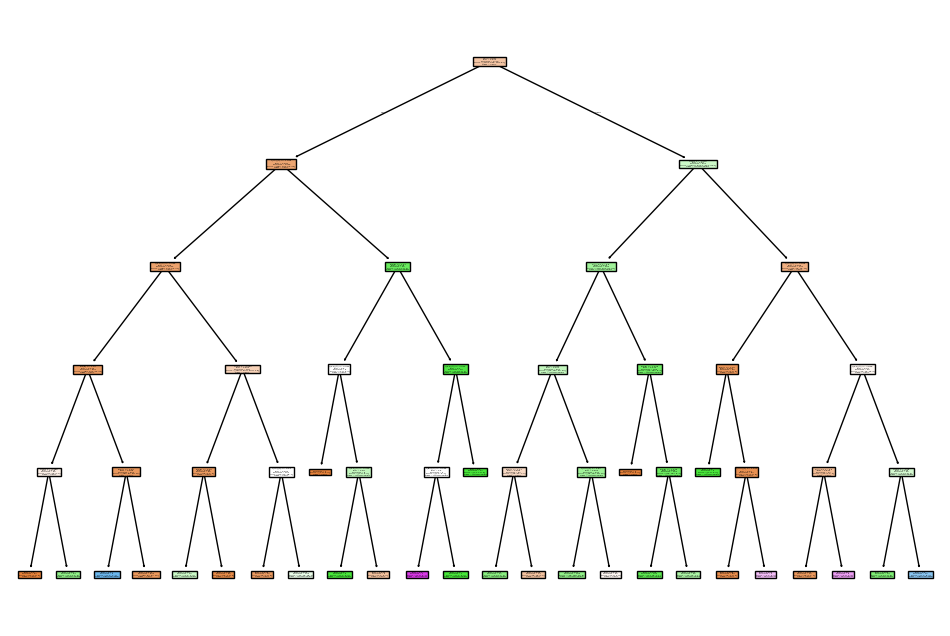

In [41]:
#further analysis
#Further analysis and visualization can be done using the following libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(best_model, feature_names=X.columns, class_names=['Cubic', 'Orthorhombic', 'Rhombohedral', 'Tetragonal'], filled=True)
plt.show()

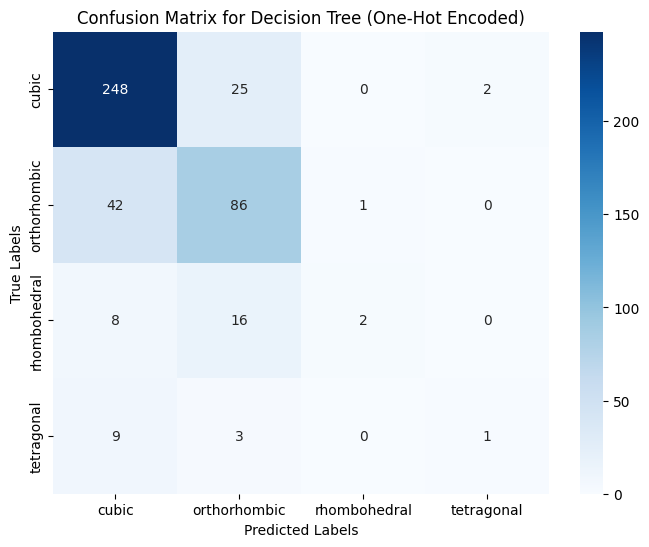

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have y_test (true labels) and y_pred (predicted labels)

# Get unique class labels directly from y_test
target_names = sorted(y_test.unique())

# 2. Create confusion matrix
cm_knn = confusion_matrix(y_test, y_pred, labels=target_names)

# 3. Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree (One-Hot Encoded)")
plt.show()

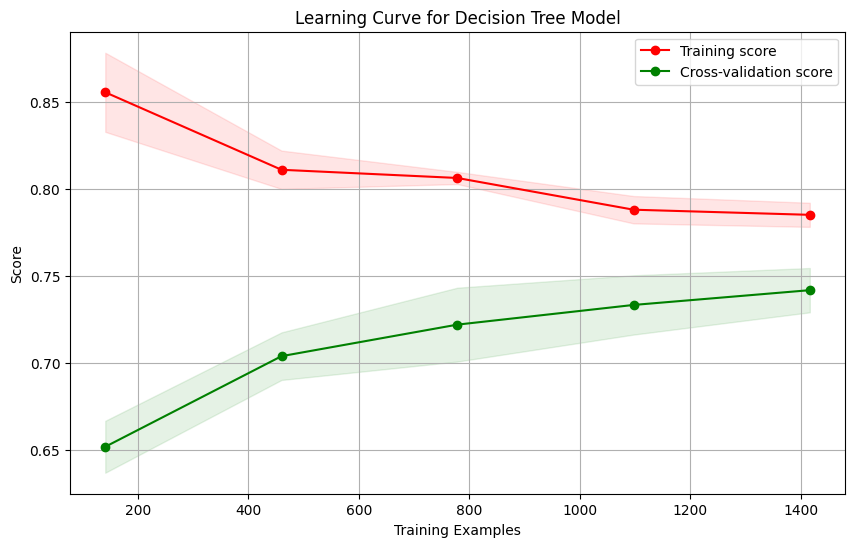

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming you have X_train, y_train, and best_model (Decision Tree) from your previous code

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='accuracy',
    n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5) # Adjust train_sizes as needed
)

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Decision Tree Model")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

#RANDOM FOREST

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy with Best Model: 0.8148984198645598
              precision    recall  f1-score   support

       cubic       0.84      0.95      0.89       275
orthorhombic       0.77      0.67      0.71       129
rhombohedral       0.65      0.42      0.51        26
  tetragonal       0.67      0.31      0.42        13

    accuracy                           0.81       443
   macro avg       0.73      0.59      0.63       443
weighted avg       0.81      0.81      0.80       443



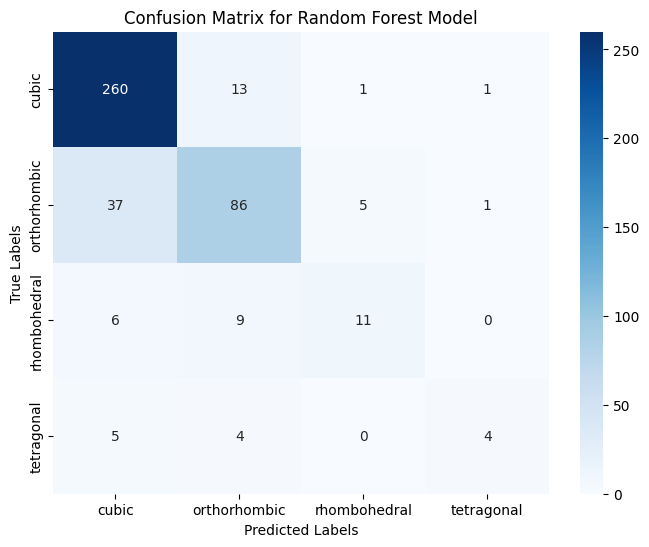

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Separate features (X) and target (y)
X = filtered_data_encoded.drop(columns=['Compound', 'Lowest_distortion'])
y = filtered_data_encoded['Lowest_distortion']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

# 3. Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# 4. Create and train the Random Forest model with GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 5. Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {best_params}")

# 6. Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Model: {accuracy}")

# 8. Generate classification report
target_names = sorted(filtered_data_encoded['Lowest_distortion'].unique())
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

# 9. Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=target_names)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

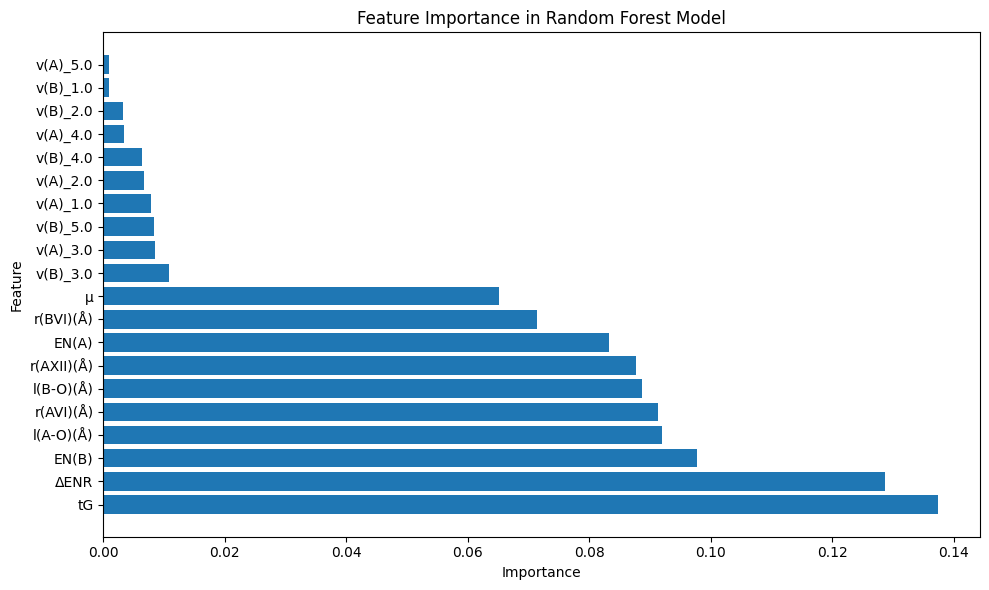

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'best_model' is your trained Random Forest model
# and 'X' is your DataFrame containing the features

# Get feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.tight_layout()
plt.show()

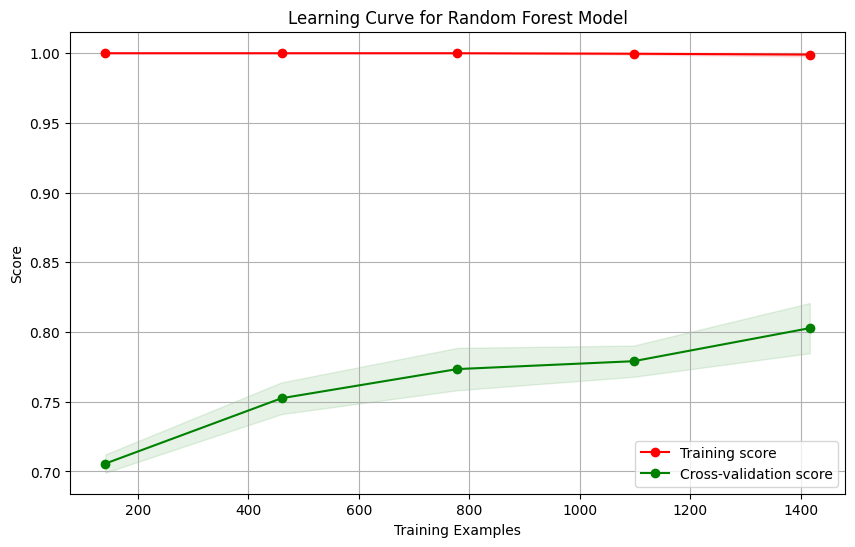

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

# Assuming you have X_train, y_train, and best_model from your previous code

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='accuracy',
    n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)  # Adjust train_sizes as needed
)

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Random Forest Model")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()


Running with less estimators




In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

X, y = filtered_data_encoded[["tG", "ΔENR", 'EN(B)']], filtered_data_encoded["Lowest_distortion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

param_grid = {
    "n_estimators":[100, 200, 300],
    "max_depth":[None, 5, 10, 15],
    "min_samples_split":[2, 5, 10],
    "min_samples_leaf":[1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
# performance of model
best_params = grid_search.best_params_
best_model  = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Model: {accuracy}")


Accuracy with Best Model: 0.7380307136404698


In [48]:
# generate classification report
target_names = sorted(filtered_data_encoded["Lowest_distortion"].unique())
report = classification_report(y_test, y_pred, target_names = target_names)
print(report)


              precision    recall  f1-score   support

       cubic       0.78      0.88      0.83       673
orthorhombic       0.64      0.66      0.65       324
rhombohedral       0.50      0.09      0.15        70
  tetragonal       1.00      0.05      0.10        40

    accuracy                           0.74      1107
   macro avg       0.73      0.42      0.43      1107
weighted avg       0.73      0.74      0.71      1107



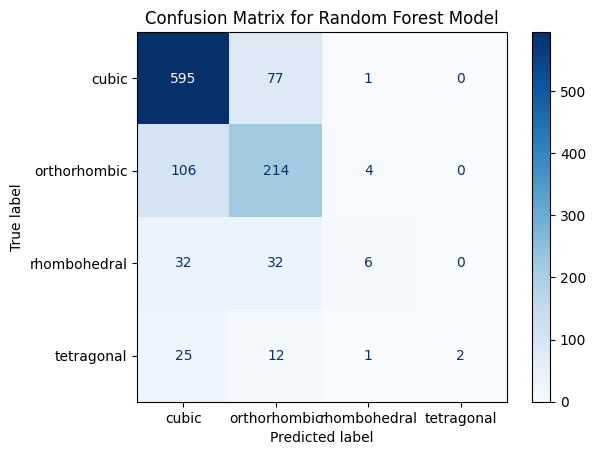

In [55]:
cm = confusion_matrix(y_test, y_pred, labels=target_names)  # Create confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)  # Create display object
disp.plot(cmap='Blues')  # Plot the confusion matrix with a blue colormap
plt.title("Confusion Matrix for Random Forest Model")  # Add a title
plt.show()  # Display the plot

# Predicting the missing lowest_distortion categories


In [112]:
print(len(data_copy.loc[data_copy["Lowest_distortion"] == '-', :]))


53


In [114]:
df_subset = data_copy[data_copy['Lowest_distortion'] == '-'].copy()

In [116]:
df_subset.shape

(53, 18)

There are 53 points in the dataset with no lowest_distortion category that we will try to predict with the random forest, which had the best accuracy


In [117]:
df_subset.dtypes

,0
Compound,object
A,object
B,object
In_literature,bool
v(A),object
v(B),object
r(AXII)(Å),float64
r(AVI)(Å),float64
r(BVI)(Å),float64
EN(A),float64


In [118]:
# Assuming df_subset is already defined

# 1. Create a copy to avoid modifying the original dataframe
df_subset_encoded = df_subset.copy()

# 2. Perform one-hot encoding on 'v(A)' and 'v(B)' columns
df_subset_encoded = pd.get_dummies(df_subset_encoded, columns=['v(A)', 'v(B)'], prefix=['v(A)', 'v(B)'])

# 3. View the first few rows to check the encoding
df_subset_encoded.head()

,Compound,A,B,In_literature,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),...,tG,τ,μ,Lowest_distortion,v(A)_-,v(A)_0,v(A)_3,v(B)_-,v(B)_0,v(B)_3
666,Ca2O3,Ca,Ca,False,1.34,1.00,1.00,1.00,1.00,2.648078,...,0.807280,-,0.714286,-,True,False,False,True,False,False
817,CeCsO3,Ce,Cs,False,1.24,0.94,1.67,1.12,0.79,2.577786,...,0.608066,-,1.192857,-,True,False,False,True,False,False
890,CoCsO3,Co,Cs,False,0.90,0.63,1.67,1.88,0.79,2.233563,...,0.529754,-,1.192857,-,True,False,False,True,False,False
963,CrCsO3,Cr,Cs,False,0.57,0.58,1.67,1.66,0.79,2.258107,...,0.453746,-,1.192857,-,True,False,False,True,False,False
1034,CsCoO3,Cs,Co,False,1.88,1.67,0.63,0.79,1.88,3.300176,...,1.142517,-,0.450000,-,True,False,False,True,False,False


In [119]:
remove_columns = ['A', 'B', 'In_literature', 'τ']
df_subset_encoded.drop(columns=remove_columns, inplace=True)
df_subset_encoded.head(5)
df_subset_encoded.shape

(53, 18)

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Separate features (X) and target (y)
X = filtered_data_encoded.drop(columns=['Compound', 'Lowest_distortion'])
y = filtered_data_encoded['Lowest_distortion']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

# 3. Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# 4. Create and train the Random Forest model with GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 5. Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {best_params}")

# Ensure df_subset_encoded has the same columns as X_train
df_subset_encoded = df_subset_encoded.reindex(columns=X_train.columns, fill_value=0)

# 8. Make predictions using the trained model on the subset:
y_pred = best_model.predict(df_subset_encoded)


# 9. Add the predicted distortions back to the original subset:
df_subset_encoded['Predicted_Lowest_distortion'] = y_pred



Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [124]:
print(df_subset_encoded['Predicted_Lowest_distortion'])

666            cubic
817     orthorhombic
890            cubic
963            cubic
1034      tetragonal
1035      tetragonal
1055      tetragonal
1060      tetragonal
1182    orthorhombic
1413           cubic
1418           cubic
1440           cubic
1456           cubic
1545    orthorhombic
1693    orthorhombic
2156    orthorhombic
2277    orthorhombic
2423    orthorhombic
2667           cubic
2715    orthorhombic
2781           cubic
2786           cubic
2788           cubic
2800           cubic
2802    rhombohedral
2805           cubic
2812           cubic
2813           cubic
2814           cubic
2822    rhombohedral
2827           cubic
2834           cubic
2836           cubic
2840           cubic
2861           cubic
2886           cubic
2929    orthorhombic
3007    orthorhombic
3040           cubic
3059           cubic
3299    orthorhombic
3431           cubic
3440           cubic
3443           cubic
3445    orthorhombic
3446           cubic
3458           cubic
3460         

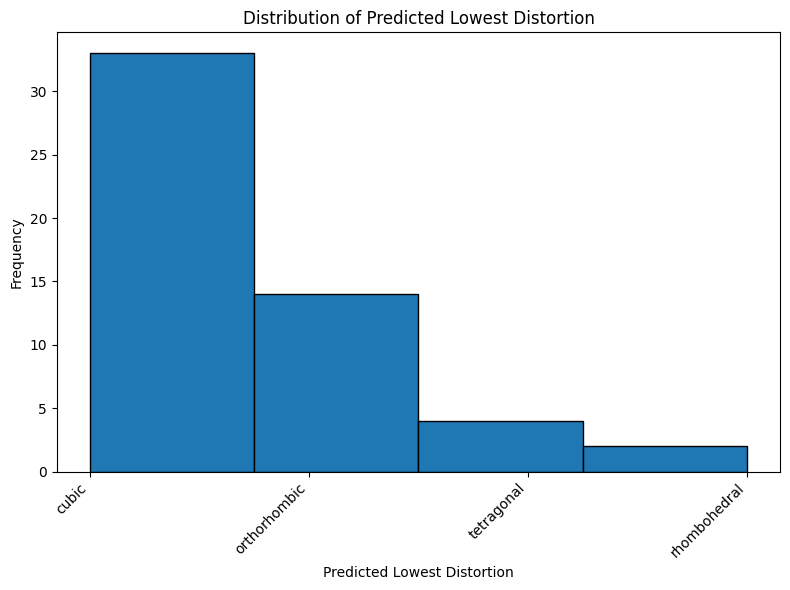

In [125]:
# Generate histogram
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.hist(df_subset_encoded['Predicted_Lowest_distortion'], bins=df_subset_encoded['Predicted_Lowest_distortion'].nunique(), edgecolor='black')
plt.xlabel("Predicted Lowest Distortion")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Lowest Distortion")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
|